# Housing Prices

In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("./data/train.csv", index_col="Id")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#colums in frame
data.columns
features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
X = data[features]
y = data["SalePrice"]
# preview
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,854,2,3,8
2,9600,1976,1262,0,2,3,6
3,11250,2001,920,866,2,3,6
4,9550,1915,961,756,1,3,7
5,14260,2000,1145,1053,2,4,9


In [11]:
# split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Models Training
- Linear Regression
- Decision Tree
- kNN

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor

### Calculate Accuracy
- mean_squared_error
- r2_error

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

### Init models instance
#### 1. Linear Regression Model

In [14]:
ln_grn_model = LinearRegression()

In [15]:
ln_grn_model.fit(X, y)

LinearRegression()

In [16]:
# head test set
y_test[:5]

Id
530    200624
492    133000
460    110000
280    192000
656     88000
Name: SalePrice, dtype: int64

- Prediction

In [17]:
y_ln_pred = ln_grn_model.predict(X_test)
y_ln_pred[:5]

array([300034.57853484, 143108.16394224, 118881.82333181, 214878.60437508,
       115159.8913244 ])

- Accuracys

In [18]:
ln_mse = mean_squared_error(y_test, y_ln_pred)
ln_r2 = r2_score(y_test, y_ln_pred)

print(f"Mean square error MSE: {ln_mse}")
print(f"R2 Error: {ln_r2}")

Mean square error MSE: 2822591751.302603
R2 Error: 0.5912752570624562


Text(0.5, 1.0, 'Actual vs. Predicted Values')

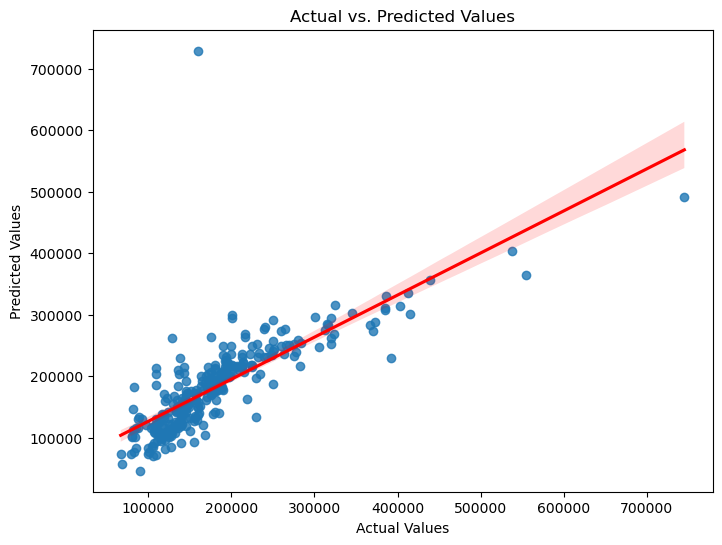

In [19]:
# review accuracy
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_ln_pred, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

Text(0.5, 1.0, 'Residual Plot')

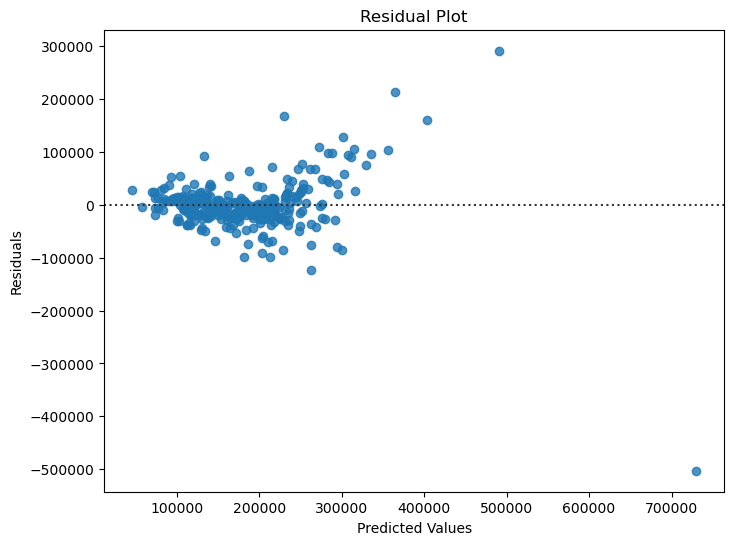

In [20]:
# Create a residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_ln_pred, y=y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

<hr>

#### 2. Decision Tree Model

In [21]:
dt_grn_model = DecisionTreeRegressor()

- Fit Dataset

In [22]:
dt_grn_model.fit(X, y)

DecisionTreeRegressor()

In [23]:
# head test set
y_test[:5]

Id
530    200624
492    133000
460    110000
280    192000
656     88000
Name: SalePrice, dtype: int64

- Prediction

In [24]:
y_dt_pred = dt_grn_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_dt_pred)
dt_r2 = r2_score(y_test, y_dt_pred)

print(f"Mean square error MSE: {dt_mse}")
print(f"R2 Error: {dt_r2}")

Mean square error MSE: 8013.698630136986
R2 Error: 0.9999988395782312


- Accuracys

#### 3. Kneibors Model

In [25]:
knn_grn_model = KNeighborsRegressor()

In [26]:
knn_grn_model.fit(X, y);

In [27]:
# head test set
y_test[:5]

Id
530    200624
492    133000
460    110000
280    192000
656     88000
Name: SalePrice, dtype: int64

- Prediction

In [28]:
y_knn_pred = knn_grn_model.predict(X_test)
y_knn_pred[:5]

array([183064.8, 147800. , 128892. , 229758. ,  95080. ])

In [29]:
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)

print(f"Mean square error MSE: {knn_mse}")
print(f"R2 Error: {knn_r2}")

Mean square error MSE: 2016291207.211096
R2 Error: 0.7080314200683588
